In [79]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from descriptors import dft_featurisation as dft_ft
from descriptors import preprocessing as pp
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from analysis import analysis_train_set_size, random_split, stratified_split 

In [80]:
df_1 = pd.read_csv('results/random_split_fp_descriptors_test_size_0.2')
df_2 = pd.read_csv('results/random_split_dft_descriptors_test_size_0.2')
df_3 = pd.read_csv('results/random_split_rxnfp_descriptors_test_size_0.2')

In [81]:
df_u = df_3.copy()
N = int(len(df_u)/10)
R2 = []
MAE = []
RMSE = []
for i in range(10):
    df = df_u[i*N:(i+1)*N]
    R2.append(r2_score(df["Yields"], df["Predicted Yields"]))
    MAE.append(mean_absolute_error(df["Yields"], df["Predicted Yields"]))
    RMSE.append(mean_squared_error(df["Yields"], df["Predicted Yields"]))
print(np.var(R2))
print(np.mean(R2))

0.0015816125024520626
0.3719023014778473


In [82]:
df_dft = pd.read_csv("data/NiCOlit.csv", sep = ',')
df_dft = pp.preprocess(df_dft)
X_dft, y_dft, DOI_dft, mechanisms_dft, origins_dft, sub_dft, lig_dft = dft_ft.process_dataframe_dft(df_dft, data_path="data/utils/", origin=False)

In [83]:
estimators = [('predictor', KNeighborsRegressor(n_neighbors=1))]
pipe = Pipeline(estimators)
metric = r2_score

In [100]:
R2 = []
for i in range(1,20):
    values, baseline_values, model_values, stratification_values, additional_stratification_values = random_split(X_dft, y_dft, origins_dft, mechanisms_dft, predictor=KNeighborsRegressor(n_neighbors=i),
                                                                                                              n_iterations=10)
    display_df =  pd.DataFrame(zip(values, baseline_values, model_values, stratification_values, additional_stratification_values), 
                           columns = ['Yields', 'Baseline', 'Predicted Yields', 'Origin', 'Coupling Partner'])
    R2.append(r2_score(display_df["Yields"], display_df["Predicted Yields"]))

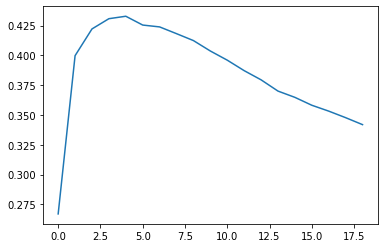

In [103]:
import matplotlib.pyplot as plt
plt.plot(R2)

In [104]:
R2.index(max(R2))

4

In [105]:
R2[0]

0.2669695488904458

In [106]:
R2[4]

0.43287567253725456

In [110]:
list(df_dft["origin"]).count("Optimisation")

702

In [111]:
list(df_dft["origin"]).count("Scope")

704